In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import time

# Day 15: Incremental Search for Bracketing and Bisection for Root-Finding

In this notebook we introduce methods of *incremental search* for locating a *bracketed interval*. Once we have an incremental search routine, we'll develop the method of *bisection* to itendify the location of a root within the bracketed interval.

## Incremental Search

As a reminder, the idea we are trying to exploit is that if $f\left(x_1\right)$ and $f\left(x_2\right)$ have opposite signs, then there *may* be a root of $f\left(x\right)$ inside the interval $\left(x_1, x_2\right)$. As a reminder, see the image below which shows the function $f\left(x\right) = x\cos\left(x\right)$ on the interval $\left[0, 2\right]$.

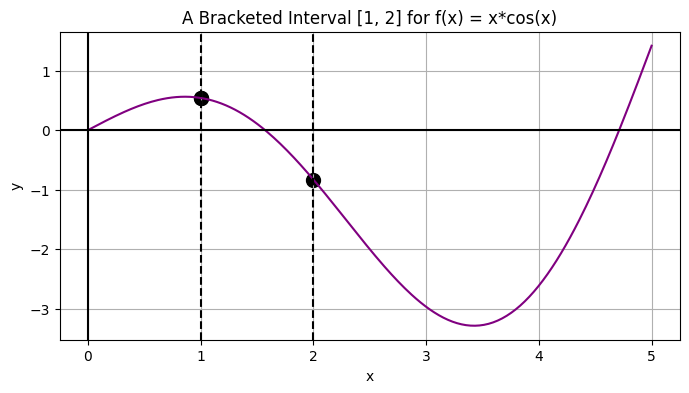

In [ ]:
#@title
x_vals = np.linspace(0, 5, 250)
y_vals = x_vals*np.cos(x_vals)

x0 = 1
y0 = x0*np.cos(x0)
x1 = 2
y1 = x1*np.cos(x1)

plt.figure(figsize = (8, 4))
plt.plot(x_vals, y_vals, color = "purple")
plt.scatter([x0, x1], [y0, y1], color = "black", s = 100)
plt.scatter([x0], [y0], color = "black", s = 100)
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.axvline(x = 1, color = "black", ls = "--")
plt.axvline(x = 2, color = "black", ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A Bracketed Interval [1, 2] for f(x) = x*cos(x)")
plt.show()

The first question to be asked is how we even obtain such a bracketed interval. Sometimes there are theoretical reasons for suspecting a function to have a root near a specific point, other times we might be able to plot the function (like we did above) and notice that a root occurs along a particular interval, but sometimes still we are working from nothing. In cases where we do not know *where* or *whether* a root of $f\left(x\right)$ exists, we can use *incremental search* to try and identify an interval with a sign change. The idea is quite simple:

1. Start with a chosen search interval `(a, b)` and sub-interval width `dx`.
2. Assign `x1 = a` and `x2 = x1 + dx`.
3. Evaluate `f(x1)` and `f(x2)` to determine if there is a sign-change.
4. If there is a sign change, then there may be a root on `(x1, x2)`.
5. If there is no sign change, update `x1 = x2` and then let `x2 = x1 + dx`, where `dx` is the width of the bracketed interval you hope to obtain.
6. Repeat steps 3 - 5 until a bracketed interval is identified or until `x2` exceeds `b`.

In order to help us grasp the procedure, let's carry out a small example.

**Example:** Given the function $f\left(x\right) = x^2 - 3x + 1$, use *incremental search* over the interval $\left[0, 1\right]$ with $dx = 0.2$ to determine whether a root may exist on the interval.

> *Solution.*

The routine will need to receive the parameters `a`, `b`, `dx`, and the function `f` whose root we want to locate. Let's try writing the routine below.

In [3]:
def incrementalSearch(f, a, b, dx):
  #Write the Incremental Search function here.
  x1 = a
  x2 = a + dx

  while (np.sign(f(x1)) == np.sign(f(x2))) and (x2 <= b):
    x1 = x2
    x2 = x1 + dx

  if np.sign(f(x1)) != np.sign(f(x2)):
    return [x1, x2]

  print("I didn't find a bracketed interval.")
  return None

In [4]:
def f(x):
  return x**2 -3*x + 1

incrementalSearch(f, 0, 1, 0.01)

[0.38000000000000017, 0.3900000000000002]

**Example:** Let's try our incrementalSearch` function on the iterval $\left[1, 2\right]$ with $f\left(x\right) = x\cdot\cos\left(x\right)$ and $dx = 0.1$.

**Example:** Use our `incrementalSearch` routine to find the root of the function $f\left(x\right) = \frac{x^2 - 9}{x + 4}e^x - 10\sin\left(x\right)$ which lies on the interval $\left[0, 5\right]$.

In [5]:
def f(x):
  frac = (x**2 - 9)/(x + 4)
  term2 = 10*np.sin(x)

  return frac*np.exp(x) - term2

incrementalSearch(f, 0, 10, 0.001)

[3.049999999999775, 3.050999999999775]

### Increasing Accuracy

The interval above has *found the location of the root, accurate to a single decimal place*. That is, the root is near $x = 1.5$. To increase accuracy, we could decrease the interval width -- using `dx = 0.0001` would give us accuracy to four decimal places but would require $10,000$ iterations to cover the entire interval from $a = 1$ to $b = 2$. We can gain efficiency by first running a *coarse* search and then running successively *finer* searches on returned bracketed intervals.

In [11]:
x1 = 2
x2 = 4

for i in range(6):
  dx = 0.1**(i+1)
  x1, x2 = incrementalSearch(f, x1, x2, dx)
  print("x1 is ", x1, " and x2 is ", x2)

print(x1, x2)

x1 is  3.000000000000001  and x2 is  3.100000000000001
x1 is  3.05  and x2 is  3.0599999999999996
x1 is  3.05  and x2 is  3.0509999999999997
x1 is  3.0502000000000002  and x2 is  3.0503000000000005
x1 is  3.050290000000001  and x2 is  3.050300000000001
x1 is  3.050297000000002  and x2 is  3.050298000000002
3.050297000000002 3.050298000000002


We can see the observed efficiencies if we time the calculation we just made versus running the `incrementalSearch()` function with `dx = 0.0001`.

In [10]:
x1 = 2
x2 = 4

tic = time.time()
for i in range(6):
  dx = 0.1**(i+1)
  x1, x2 = incrementalSearch(f, x1, x2, dx)

print(x1, x2)
toc = time.time()

print(toc - tic)

3.050297000000002 3.050298000000002
0.0016620159149169922


In [9]:
tic = time.time()
incrementalSearch(f, 2, 4, 0.000001)
print(x1, x2)
toc = time.time()

print(toc - tic)

3.050297000000002 3.050298000000002
8.805996894836426


The advantage to increasing accuracy this way is that we obtain a smaller interval within which the root is to be found. This can be beneficial when we use *bisection* or *linear interpolation* methods to close in on the true value of the root.

## The Bisection Method

After a root $f\left(x\right)$ has been bracketed in the interval $\left(x_1, x_2\right)$, the bisection method is one of several methods that can be used to "close in" on the location of the root. The bisection method is simple and works by computing the midpoint of the interval and looking at which half of the interval still corresponds to the sign change. That is, given a function $f\left(x\right)$ and a bracketed interval $\left(x_1, x_2\right)$

1. Compute `x3 = (x1 + x2)/2`.
2. Evaluate `f(x3)`
3. If there is a sign change between `f(x1)` and `f(x3)`, then update `x2 = x3`. Otherwise, update `x1 = x3`.
4. Repeat steps 1 - 3 until the desired tolerance has been achieved.
5. Estimate the root as `(x1 + x2)/2`.

To get the hang of this, lets work an example by hand.

**Example:** The function $f\left(x\right) = x^2 - 5x + 3$ has a root on the interval $\left[0, 2\right]$. Verify that this interval is bracketed, and then carry out four iterations of the bisection method to approximate the value of the root. Determine the level of accuracy that you've obtained through this procedure.

> *Solution.* Let's start by evaluating $f\left(0\right)$ and $f\left(2\right)$. That is, $x_1 = 0$ and $x_2 = 2$.
>
> + Notice that $f\left(x_1\right) = f\left(0\right) = 3$, so $f\left(x_1\right)$ is positive.
> + Similarly, $f\left(x_2\right) = f\left(2\right) = -3$, so $f\left(x_2\right)$ is negative.
> + The interval is bracketed!
>
> Now, let $x_3 = \frac{2 + 0}{2} = 1$, the midpoint between $x_1$ and $x_2$. We'll evaluate $f\left(x_3\right)$ and look for which half-interval remains bracketed.
>
> + $f\left(x_3\right) = f\left(1\right) = -1$, so $f\left(x_3\right)$ is negative.
>
> Now, notice that there is a sign change between $x_1$ and $x_3$. We'll let $x_2 = 1$ and $x_1$ stay at $0$. From here, we'll repeat.
>
> + Let our new $x_3 = \frac{0 + 1}{3} = 0.5$.
> + Now, $f\left(0.5\right) = 0.75$, which means $f\left(x_3\right)$ is positive.
> + Recall that $f\left(x_1\right)$, where $x_1$ was $0$, is positive.
> + Similarly, recall that $f\left(x_2\right)$, where $x_2$ was $1$, is negative.
>
> The sign change now occurs between our new $x_3$ and $x_2$ (which is 1). At this point, we replace $x_1$ with $0.5$ and let $x_2$ stay at $1$.
>
> + We calculate our new $x_3$ to be the midpoint of this new interval, $x_3 = \frac{0.5 + 1}{2}$, so $x_3 = 0.75$.
> + We'll evaluate $f\left(x_3\right)$, and notice that $f\left(0.75\right) = -0.1875$. That is, $f\left(x_3\right)$ is negative.
> + Recall that $f\left(x_1\right)$, where $x_1$ was $0.5$, is positive.
> + Similarly, recall that $f\left(x_2\right)$, where $x_2$ was $1$, is negative.
>
> The sign change occurs between $x_1$ (which is $0.5$) and $x_3$ (which is $0.75$). We'll update $x_2$ to be $0.75$ now.
>
> At this point, we know the root is between $0.5$ and $0.75$. We can report the midpoint of this interval as an approximation of the root -- that is, $x_{\text{root}} \approx \frac{0.5 + 0.75}{2} = 0.625$. If we want greater precision, then we can continue on with (i) bisecting, and (ii) updating the bracketed interval, to obtain increased precision. $_\blacktriangledown$

Let's try writing our bisection routine.

In [12]:
# Root-finding via bisection
def bisection(f, x1, x2, tol = 1.0e-9):
  dx = (x2 - x1)
  y1 = f(x1)
  y2 = f(x2)

  if np.sign(y1) == np.sign(y2):
    print("The interval [x1, x2] is not bracketed. \nPlease provide a bracketed interval to start.")
    return None

  while dx > tol:
    x3 = (x1 + x2)/2
    y3 = f(x3)

    if np.sign(y1) == np.sign(y3):
      x1 = x3
    else:
      x2 = x3

    y1 = f(x1)
    y2 = f(x2)
    dx = dx/2

  x = (x1 + x2)/2
  return x

**Example:** Use our Bisection function to approximate the root of the function $f\left(x\right) = x\cdot \cos\left(x\right)$ in the bracketed interval $\left[1, 2\right]$.

> *Solution.*

**Example:** Use `bisection` to find the root of the function $f\left(x\right) = \frac{x^2 - 9}{x + 4}e^x - 10\sin\left(x\right)$ which lies on the interval $\left[2, 4\right]$.

In [13]:
def my_function_f(x):
  term1 = (x**2 - 9)/(x + 4)*np.exp(x)
  term2 = 10*np.sin(x)

  return term1 - term2

root_est = bisection(my_function_f, 2, 4)
print("The estimate for the root is at x = ", root_est)

The estimate for the root is at x =  3.0502975867129862


The bisection method converges very quickly to an accurate approximation of the root. Notice that we have 8 decimal places of accuracy here. How long do you think it would take to get even just 5 decimal places of accuracy, searching over the same interval using incremental search?

The punchline here is that we should use incremental search to find a bracketed interval -- we'll use a relatively large `dx` value for this. Once we have the bracketed interval, we can hand things over to the bisection method to quickly close in on the location of the root.

**Example:** The natural frequencies of a uniform cantilever beam are related to the roots $\beta_i$ of the frequency equation $f\left(\beta\right) = \cosh\left(\beta\right)\cos\left(\beta\right) + 1$, where

\begin{align*} \beta_i^4 &= \left(2\pi f_i\right)^2\frac{\tt{m}\tt{L}^3}{\tt{E}\tt{I}}\\
f_i &= i^{th}~\text{natural frequency ($\tt{cps}$)}\\
m &= ~\text{mass of the beam}\\
L &= ~\text{Length of the beam}\\
E &= ~\text{modulus of elasticity}\\
I &= ~\text{moment of inertia of the cross section}
\end{align*}

Determine the lowest two frequencies of a steel beam $0.9~\tt{m}$ long, with rectangular cross-sections $25~\tt{mm}$ wide and $2.5~\tt{mm}$ high. The mass-density of steel is $7580~\tt{kg/m}^3$ and $E = 200~\text{GPa}$.

> *Solution.*

***

## Summary

In this notebook, we introduced and implemented the method of *incremental search* for locating *bracketed intervals*, and also the *bisection method* for quickly closing in on the location of a root on the interior of a bracketed interval. These techniques can be utilized to solve equations of the form $f\left(x\right) = 0$ for any function given some initial search interval.

In the next notebook we'll look at series of techniques called *linear interpolation* which complement the bisection method we encountered here.